# The Big Idea 


**Imagine the data centre is now in Bologna, you are a scientist in Reading or in starbucks with a laptop**  


**What can you use to access data, manipule them, and create a nice output?**


**Is there a way that you can connect to a simple URL, and perform all these tasks on some 'machines' in Bologna?**



# The Big Puzzle 


### JupyterHub   

### Data - Xarray - DASK 

### Cloud technology - Data Access

### Kubernetes and its pods


#     ... And only a week to put the pieces together !

# Day 1 - Setting a single user JupyterHub on the Kubernetes HackathonCluster


**Starting from [zero-to-jupyterhub](https://zero-to-jupyterhub.readthedocs.io/en/latest/)**

**and finishing the day with a glorious "hello world"**

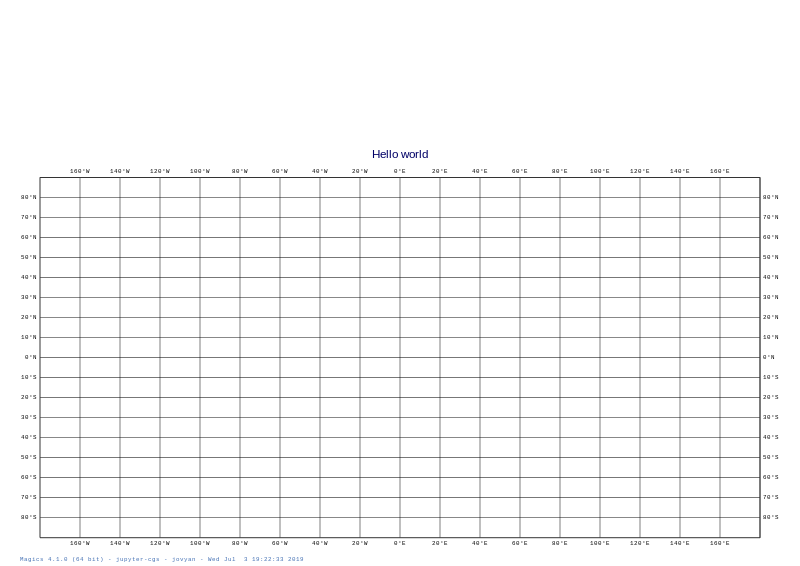

In [2]:
from Magics import macro

macro.plot(macro.mcoast(), macro.mtext(text_lines = ["Hello world "]))

# Opened Questions : 
   * Nice, but we are all sharing the same space : we need to introduce a notion of users
   * Nice, but we can't save anything : no persistent storage 
   * Nice, but we have no data 😉 --> What about?
       * Uploading data 
       * adding the  cdsapi client
       * Accessing Carlos Objectstore
       * Accesing Cihan and Pierre Postgres Database 
   

# Day 2 - Day 3 : Speeding up the setup, accessing some data !

# Access to Carlos Objectore

In [8]:
import boto3
import os
s3 = boto3.client('s3', endpoint_url='http://%(AWS_ENDPOINT)s' % os.environ)
objs = s3.list_objects(Bucket='eccharts-fields')
object_name = objs['Contents'][0]['Key']
data = '/tmp/bucket-%d.grib' % 0
s3.download_file('eccharts-fields', object_name, data)
print (data)

/tmp/bucket-0.grib


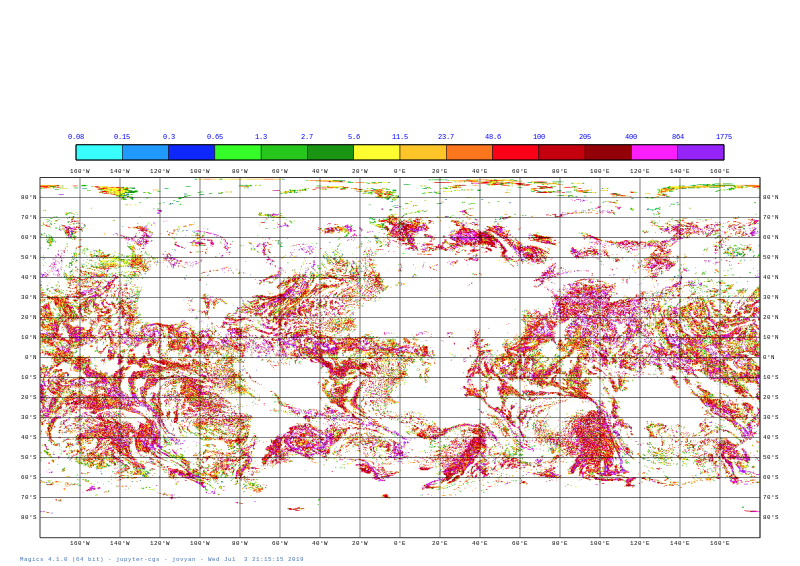

In [3]:
from Magics import macro
data = '/tmp/bucket-0.grib'
data = macro.mgrib(grib_input_file_name = data)
contour = macro.mcont(contour_automatic_setting = "ecmwf", legend=True)
legend = macro.mlegend(legend_display_type="continuous")
macro.plot(data, contour, macro.mcoast(),  macro.mtext(), legend,  )


# Access to Carlos Objectore with some encapsulation

In [8]:
from ecmwf_utils import get_data_bucket
from ecmwf_utils import get_metadata_bucket

from ecmwf_utils import geoplot
from Magics import macro


In [13]:

def random_metadata(index):
    data = get_metadata_bucket(index)
    print ('loading index --> %d' % index)
    for d in data :
        print ('%s = %s' % (d, data[d]))

random_metadata(5)

loading index --> 5
Key = 20190630_0000/crfrate-2fb7918cd0414ce6ab92611f77521983.grib
LastModified = 2019-07-01 20:37:28.207000+00:00
ETag = "ca8f318605d523647dfbd24b383385f9-2"
Size = 13204588
StorageClass = STANDARD
Owner = {'DisplayName': '', 'ID': '02d6176db174dc93cb1b899f7c6078f08654445fe8cf1b6ce98d8855f66bdbf4'}


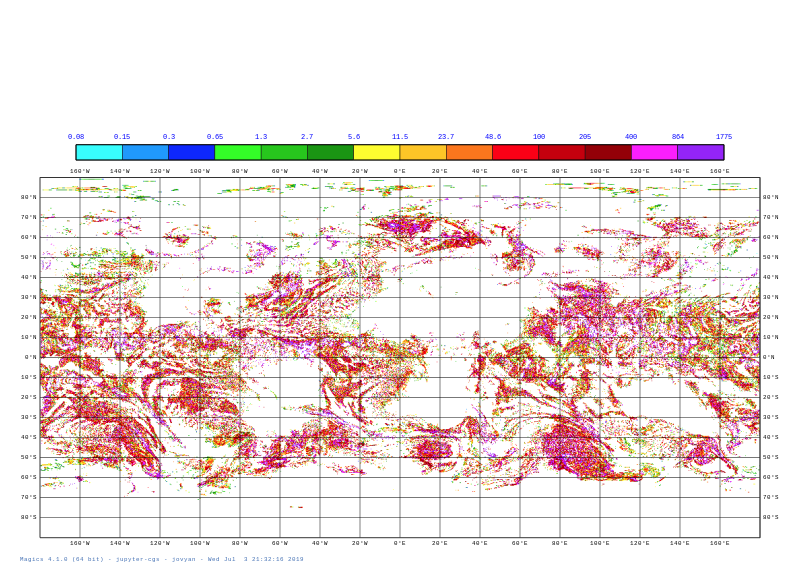

In [14]:

def random_plot(index):
    data = macro.mgrib(grib_input_file_name = get_data_bucket(index))
    return geoplot(data)

random_plot(5)

# Access to Cihan/Pierre Postgres database

In [22]:
import requests

lat = 50
lon = 1
r = requests.get("http://point-db-api.sylvie.svc.cluster.local:5000/time-series/lat/%d/lon/%d" % (lat, lon))

data = r.json()
print (data)

{'lat': 50, 'lon': 1, 'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], 'y': [15.912498, 16.236656, 22.166069, 21.888466, 16.41578, 17.313759, 28.826332, 26.95478, 18.95794, 18.05198, 28.168144, 28.672691, 20.999748, 18.680016, 28.55262, 27.902657, 21.250679, 20.882637, 32.5931, 23.573479, 18.239494, 16.567146, 22.789131, 19.150581, 14.624031, 15.336662, 19.677055, 17.346, 13.174965, 14.708778, 17.708687, 15.963814, 11.125435, 13.594292, 18.527565, 17.895256, 12.442406, 12.344032, 21.435936, 18.16433]}


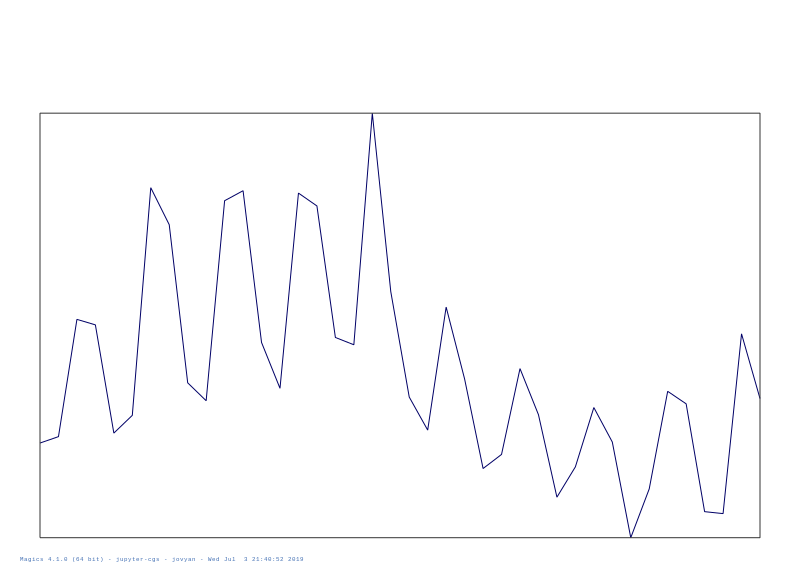

In [28]:
projection = macro.mmap(subpage_map_projection = 'cartesian',
                subpage_x_automatic = 'on',
                subpage_y_automatic = 'on',
                     )
data['x'][0] = data['x'][0]*0.1
input = macro.minput(input_x_values = data['x'],
            input_y_values = data['y'])
graph = macro.mgraph(graph_line_colour = "navy", 
                         graph_line_thickness = 2)
    
macro.plot(projection, input, graph)

# Access to Cihan/Pierre Postgres database with some encapsulation

In [30]:
from ecmwf_utils import time_series
from ecmwf_utils import xyplot

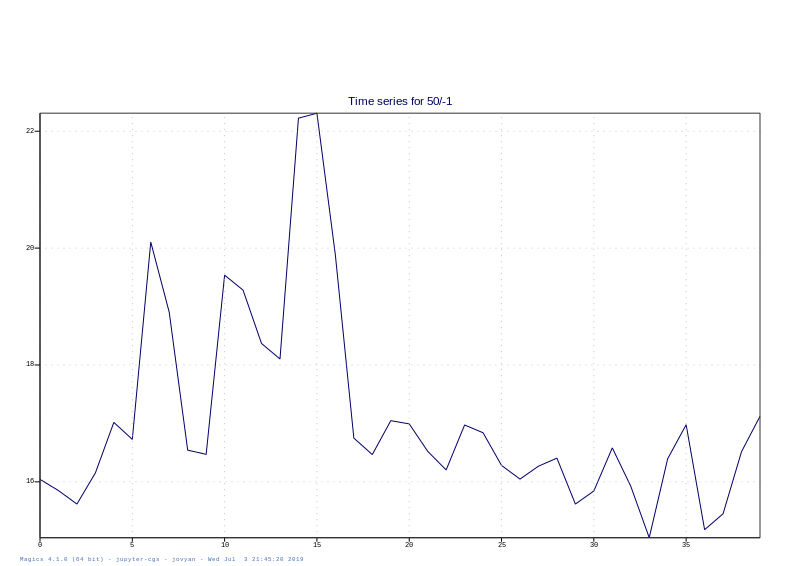

In [31]:
def plot_time_series(lat, lon):
    tlon = lon
    if lon < 0:
        lon = lon + 360
    data = time_series(lat, lon)
    return xyplot(data['x'], data['y'], "Time series for %d/%d" % ( lat, tlon))

plot_time_series(50, -1)

# Day 4  Multi users system and git extension

* Experiment on Github .. working okish but not really elegant yet, and fighting a lot with the proxy!
* But you can find all the examples at (https://github.com/sylvielamythepaut/hackathon)
* And Yes we did it 😁: we connected to the authentication system


# Is the big puzzle complete? 

# JupyterHub: 

* __jupyter offers a nice and familiar interface__ 
* __Notebooks are popular for training__ 


* setting up a jupyterhub could be an excellent way to setup a metview like environment, where users can
     * Discover data and encapsuling their complex access in a simplified way.
     * Manipulate them, we still need to investigate the power of xarray and dask to work on a distributed way 
     * Visualise the result
     * Share notebooks 
* setting up this small prototype has allow us to identify few areas to understand better
    * how to share notebooks?
    * How to import python modules?


# data - xarray - dask

* Quite a lot of limitations
    * regular grid only
* Still some progress to do on the easy loading of a grib in an xarray


# Cloud technology - Data Access

* Perfect enviromment to access data from different sources
* Can do with more metadata


# Kubernetes and its pods

* A lot of concepts to understand 
* But, quite robust to our errors 😉
* The setting of the API service to access Cihan/Pierre database was fun and easy 

# .... Perhaps not complete but a lot less blurry ! 